In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset
df = pd.read_csv("heart.csv")

In [12]:
# Display all columns
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [13]:
# Display first and last rows
print(df.head())
print(df.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0      0.0      159      0      0.0

In [14]:
# Descriptive statistics
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000     0.000000    71.000000  

In [15]:
# Check for missing values
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

In [17]:
# Check missing values after imputation
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
# Check for outliers (example: cholesterol)
chol_outliers = df[df['chol'] > df['chol'].quantile(0.99)]
print("Outliers in cholesterol:", chol_outliers)

Outliers in cholesterol:      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1      0.0      157      0      0.8   
158   67    0   2       115   564    0      0.0      160      0      1.6   
179   56    0   0       134   409    0      0.0      150      1      1.9   
192   67    0   2       115   564    0      0.0      160      0      1.6   
464   67    0   2       115   564    0      0.0      160      0      1.6   
641   56    0   0       134   409    0      0.0      150      1      1.9   
665   65    0   2       140   417    1      0.0      157      0      0.8   
958   65    0   2       140   417    1      0.0      157      0      0.8   
996   56    0   0       134   409    0      0.0      150      1      1.9   

     slope  ca  thal  target  
123      2   1     2       1  
158      1   0     3       1  
179      1   2     3       0  
192      1   0     3       1  
464      1   0     3       1  
641      1   2     3       0

In [19]:
# Remove outliers
df = df[df['chol'] <= df['chol'].quantile(0.99)]

In [20]:
# Data shape before and after outlier removal
print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (1016, 14)


In [21]:
# Numerical Analysis
chol_mean = df['chol'].mean()
chol_median = df['chol'].median()
chol_std = df['chol'].std()
trestbps_mean_with_disease = df[df['target'] == 1]['trestbps'].mean()
trestbps_mean_without_disease = df[df['target'] == 0]['trestbps'].mean()
thalach_max = df['thalach'].max()
thalach_min = df['thalach'].min()


In [22]:
print("Cholesterol - Mean:", chol_mean, "Median:", chol_median, "Std Dev:", chol_std)
print("Mean BP with Disease:", trestbps_mean_with_disease, "Mean BP without Disease:", trestbps_mean_without_disease)
print("Max Heart Rate:", thalach_max, "Min Heart Rate:", thalach_min)


Cholesterol - Mean: 244.0748031496063 Median: 239.5 Std Dev: 47.0938933733946
Mean BP with Disease: 129.26538461538462 Mean BP without Disease: 134.10685483870967
Max Heart Rate: 202 Min Heart Rate: 71


In [23]:
# Sorting & Searching
sorted_by_chol = df.sort_values(by='chol', ascending=False)
high_chol_patients = df[df['chol'] > 300]
old_ecg_patients = df[(df['age'] > 60) & (df['restecg'] > 0)]

In [24]:
print("Patients with cholesterol above 300:", high_chol_patients.shape[0])
print("Patients older than 60 with abnormal ECG:", old_ecg_patients.shape[0])

Patients with cholesterol above 300: 137
Patients older than 60 with abnormal ECG: 120


In [25]:
# Reshape & Split
data_array = df.values
reshaped_data = np.reshape(data_array, (-1, df.shape[1]))
split_data = np.split(reshaped_data, 2)


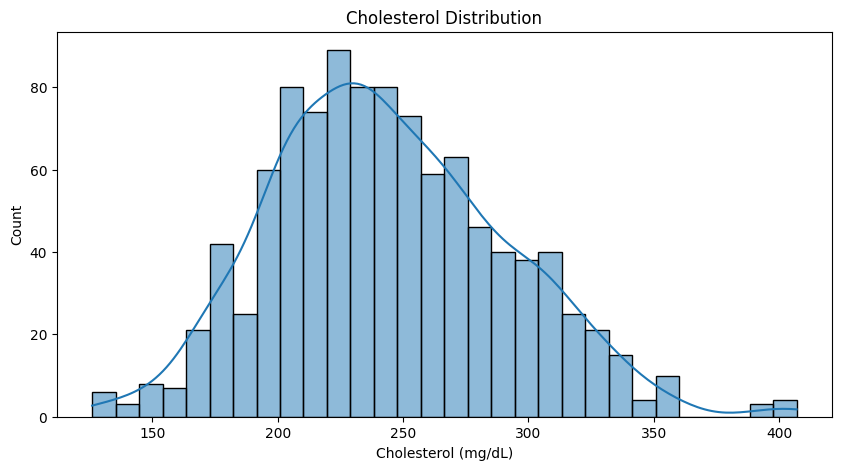

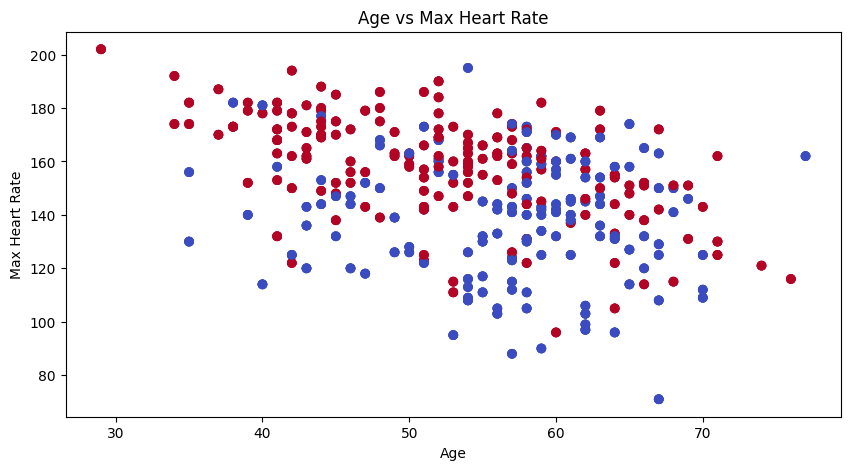

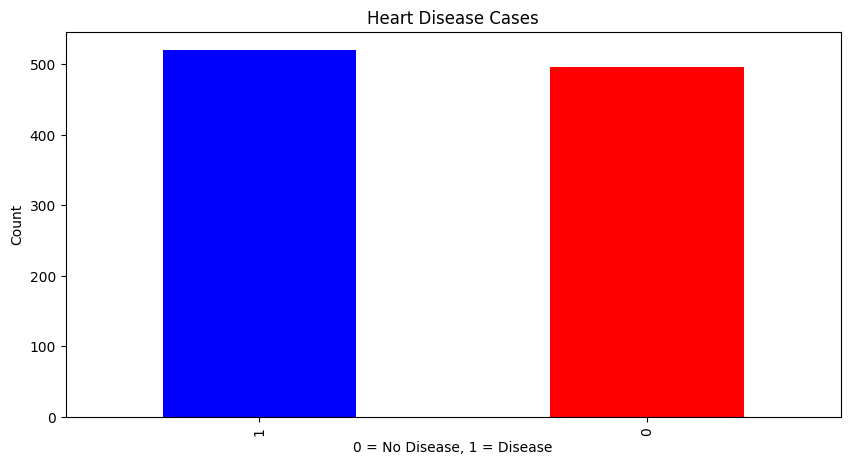

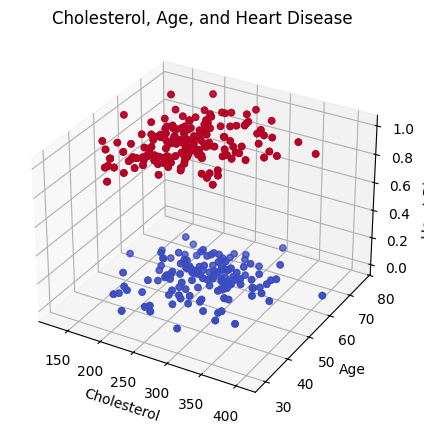

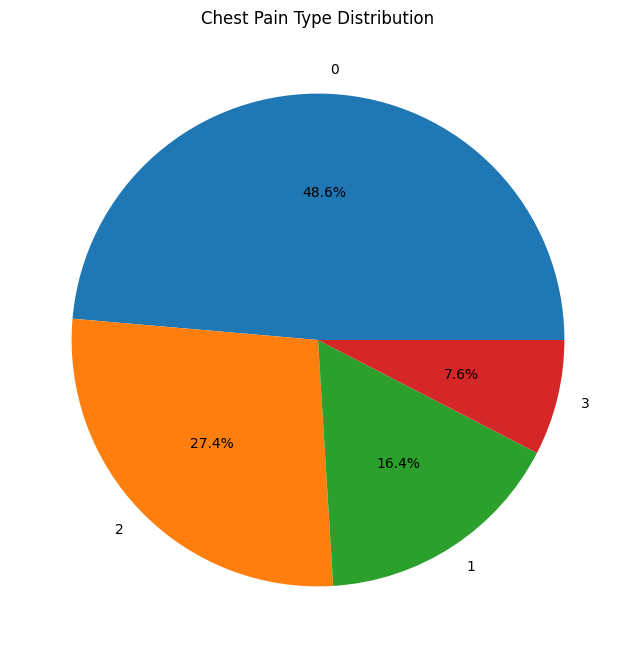

In [26]:
# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['chol'], bins=30, kde=True)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol (mg/dL)")
plt.show()
plt.figure(figsize=(10, 5))
plt.scatter(df['age'], df['thalach'], c=df['target'], cmap='coolwarm')
plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()
plt.figure(figsize=(10, 5))
df['target'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Heart Disease Cases")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['chol'], df['age'], df['target'], c=df['target'], cmap='coolwarm')
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Age")
ax.set_zlabel("Heart Disease")
plt.title("Cholesterol, Age, and Heart Disease")
plt.show()

plt.figure(figsize=(8, 8))
df['cp'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Chest Pain Type Distribution")
plt.ylabel("")
plt.show()